# **Atividade 4**
**Ector Magalhães Barreiros da Silva**

# **A**

(0.0, 11.0)

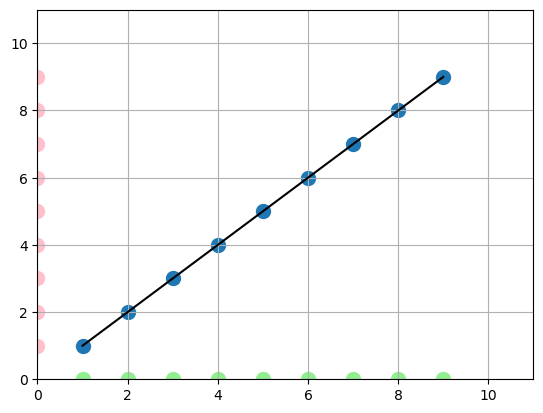

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy import stats

positive_correlation= pd.DataFrame({"Gene X": np.linspace(1, 9, 9), "Gene Y":np.linspace(1, 9, 9)})
x_equals_0= pd.DataFrame({"Gene X": np.zeros(9), "Gene Y":np.linspace(1, 9, 9)})
y_equals_0= pd.DataFrame({"Gene X": np.linspace(1, 9, 9), "Gene Y":np.zeros(9)})


#Plot
plt.Figure([10, 10])
plt.scatter(positive_correlation.iloc[:, 0], y= positive_correlation.iloc[:, 1], s=100)
plt.plot(positive_correlation["Gene X"], positive_correlation["Gene Y"], 'k-')
#X = 0
plt.scatter(x_equals_0.iloc[:, 0], y= x_equals_0.iloc[:, 1], s=100, color='pink')

#Y = 0
plt.scatter(y_equals_0.iloc[:, 0], y= y_equals_0.iloc[:, 1], s=100, color='lightgreen')

plt.title("")
plt.grid(True)
plt.xlim(0, 11)
plt.ylim(0, 11)

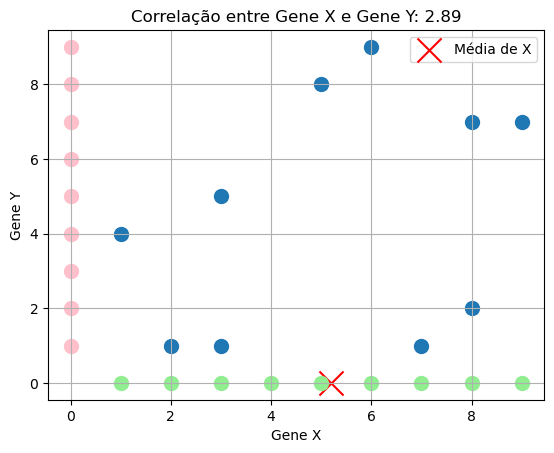

In [2]:
grafico_2= pd.DataFrame({"Gene X": np.random.randint(1, 10, 10), "Gene Y":np.random.randint(1, 10, 10)})
grafico_2
plt.Figure([10, 10])
plt.scatter(grafico_2.iloc[:, 0], y= grafico_2.iloc[:, 1], s=100)
plt.scatter(grafico_2['Gene X'].mean(), 0, color='red', marker='x', label="Média de X", s=300)

#Linear regression
result = linregress(grafico_2.iloc[:, 0], y= grafico_2.iloc[:, 1])
slope, intercept, r_value, p_value, stderr = result


#X = 0
plt.scatter(x_equals_0.iloc[:, 0], y= x_equals_0.iloc[:, 1], s=100, color='pink')

#Y = 0
plt.scatter(y_equals_0.iloc[:, 0], y= y_equals_0.iloc[:, 1], s=100, color='lightgreen')

plt.legend()
plt.title(f"Correlação entre Gene X e Gene Y: {np.cov(grafico_2.iloc[:, 0], grafico_2.iloc[:, 1])[0, 1]:.2f}")
plt.xlabel("Gene X")
plt.ylabel("Gene Y")
plt.grid(True)

# **B**

In [15]:
#!pip install kagglehub
import kagglehub
import os
# Download latest version
path= kagglehub.dataset_download("burnoutminer/heights-and-weights-dataset")
print(path)
data_measure= pd.read_csv(os.path.join(path, "SOCR-HeightWeight.csv"))
data_measure.iloc[:, 1]= data_measure.iloc[:, 1] *2.54
data_measure.rename(columns={"Height(Inches)": "Altura (cm)"}, inplace=True)
data_measure.drop(columns=["Weight(Pounds)", "Index"], inplace=True)

C:\Users\T-GAMER\.cache\kagglehub\datasets\burnoutminer\heights-and-weights-dataset\versions\1


In [16]:
media_measure= np.mean(data_measure.iloc[:, 0])
stdev_measure= np.std(data_measure.iloc[:, 0])
data_measure

,Altura (cm)
0,167.089607
1,181.648633
2,176.272800
3,173.270164
4,172.181037
...,...
24995,176.535461
24996,163.952580
24997,164.334317
24998,171.524117


Resultado com Intervalo de confiança 90.0%: (np.float64(172.6522585972828), np.float64(172.7527584744612))
Resultado com Intervalo de confiança 95.0%: (np.float64(172.64263136073512), np.float64(172.76238571100887))
Resultado com Intervalo de confiança 99.0%: (np.float64(172.62381439025694), np.float64(172.78120268148706))


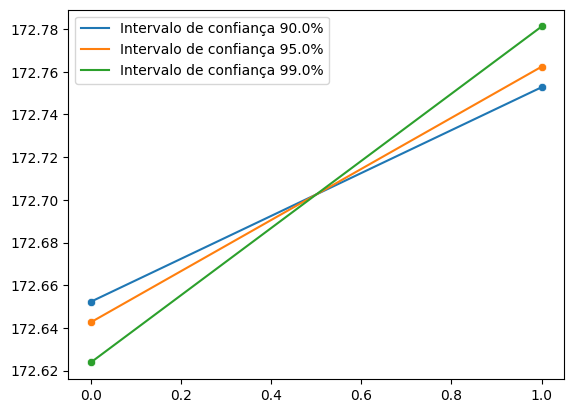

In [100]:
import seaborn as sns
from scipy.stats import t
confidence_inter= [0.90, 0.95, 0.99]
liberdade= len(data_measure) - 1

confidence_data= []
for i in confidence_inter:
  confi= t.interval(i, liberdade, loc=media_measure, scale=stdev_measure/np.sqrt(len(data_measure)))
  confidence_data.append(confi)
  print(f"Resultado com Intervalo de confiança {i*100}%: {confi}")
plt.Figure([10,5])
for i in confidence_data:
  sns.scatterplot(i)
  plt.plot(i, label=f"Intervalo de confiança {confidence_inter[confidence_data.index(i)]*100}%")
  plt.legend()

plt.show()

# **C**

**Hipótese nula: A média da população é igual a 1.70**

In [87]:
#Pre-processamento
data_measure= pd.read_csv(path)
data_measure.iloc[:, 1]= data_measure.iloc[:, 1] *2.54
data_measure.rename(columns={"Height(Inches)": "Altura (cm)", "Weight(Pounds)": "Peso (KG)"}, inplace=True)
data_measure.iloc[:, 2]= data_measure.iloc[:, 2] * 0.4535
nivel_sig= 0.05
grupo_controle, grupo_teste, _, _= train_test_split(data_measure.drop(columns= ["Index", "Peso (KG)"]), data_measure.iloc[:, 0], test_size=0.5)

###

statistic, p_value=ttest_ind(grupo_controle, grupo_teste)
if p_value < nivel_sig:
  print("A hipótese nula é rejeitada. A média da população é diferente de 1.70")
else:
  print("A hipótese nula não pode ser rejeitada.")

A hipótese nula não pode ser rejeitada.


# **D**

Link SLIDES: https://docs.google.com/presentation/d/11VKjFUh_d2KVGxaflwx-ESBeuTf9muX_Ye4SF7WGy8k/edit?usp=sharing

In [90]:
import numpy as np
from scipy.stats import ttest_ind


num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10



significant_results = 0

significance_level = 0.005
for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    t_stat, p_value = ttest_ind(group1, group2)
    if p_value < significance_level:
        significant_results += 1

proportion_significant = significant_results / num_simulations

print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")


Number of simulations: 10000
Significance level (alpha): 0.005
Proportion of significant results (Type I error rate): 0.0050


# **E**

In [97]:
n = 50
confidence_level = 0.95
alpha = 1 - confidence_level
#Média
true_mean = 74
true_std = 8
degrau_liberdade= n - 1
dado_amostral= np.random.normal(loc=true_mean, scale=true_std, size=n)
media_amostral= np.mean(dado_amostral)
std_amostral= np.std(dado_amostral)

conf_int_media = stats.t.interval(
    confidence_level,
    df=degrau_liberdade,
    loc=media_amostral,
    scale=std_amostral / np.sqrt(n)
)
conf_int_media



# Proporção
dado_amostral_bin = np.random.binomial(n=1, p=0.16, size=n)
sucesso= dado_amostral_bin.sum()
prop= sucesso / n
conf_int_prop = stats.norm.interval(confidence_level, loc=prop)

print(f"Intervalo de confiança para a média: {conf_int_media}")
print(f"Intervalo de confiança para a proporção: {conf_int_prop}")

Intervalo de confiança para a média: (np.float64(70.8431808667743), np.float64(75.68811376798803))
Intervalo de confiança para a proporção: (np.float64(-1.679963984540054), np.float64(2.2399639845400543))
